<a href="https://colab.research.google.com/github/congardiner/ML-Projects/blob/main/NN_Bikes_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load some test data
import pandas as pd
import numpy as np
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes.head()
bikes.describe()
bikes.info()

# Exploration of the Data, cleansing of the features, and renaming in order to make them more interpretable for the dataset.



# Register and Casual are the target features, it is recommended to create two different models. The same feature engineeering will be done within the mini-holdout and then compile the two results together, however, this will make it
# work the best within the modeling process.
# Dropout appears to be the best in terms of the loss functions that aid in improving the R2 score.
# GeLU so far is the best one to use, RELU did amazing but was not nearly as good during the exploration phase.
# NEED to normalize and scale the features, otherwise the model doesn't work very well... Just a note for future exploration.
# Adam is probably the best to use for hyper-parameters.
# Temperature appears to be the most important feature, however, it doesn't account for the Months of Nov, Dec, and Jan it appears?




bikes['dteday'].describe()

### Day of the Week Conversion Process ### (for readability)
# Conversion of the DAY of the Week
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

# Extract week of the year (ie, in a 52 week calendar)
bikes['week'] = bikes['dteday'].dt.isocalendar().week

# Dat of the week (Monday=0, Sunday=6)
bikes['day_of_week'] = bikes['dteday'].dt.weekday

bikes['month'] = bikes['dteday'].dt.month

# After the cleansing process.
bikes.head()
bikes.describe()


# Based off of the season
# This is quite well-balanced for the seasons...
# No outliers identified.
bikes['season'].unique()
bikes['season'].value_counts()
bikes['season'].info()


# weathersit
# are there any outliers that need to be removed, like percentages of weather conditions are that not compliant?
bikes['weathersit'].unique()
# bikes['weathersit'].value_counts()
# bikes['weathersit'].info()
bikes['weathersit'].describe()

# Holiday Testing

bikes['holiday'].unique()
bikes['holiday'].value_counts()
# bikes['holiday'].info()
bikes['holiday'].describe()

# Working Day Testing
# 1 is for a normal day (there appears to be a lot more people here than on holidays and weekends.)
# 0 is for weekend and holidays.
# More people reported biking within the weekdays / workweek which is interesting...
bikes['workingday'].unique()
bikes['workingday'].value_counts()
# bikes['workingday'].info()
# bikes['workingday'].describe()


# Temperature Exploration:
# Converted to Fahrenheit from Celsius for normalizing the data between different users / demographics, as USA VS World Scales.
# Convert Celsius to Fahrenheit and create a new column
bikes['temp_f'] = (bikes['temp_c'] * 9/5) + 32

# Display the first few rows to see the new column
bikes.head()


# Convert "feels like" Celsius to Fahrenheit and create a new column
bikes['feels_like_f'] = (bikes['feels_like_c'] * 9/5) + 32

# Display the first few rows to see the new column
print(bikes.head())


#### Casual Versus the Registered Users for the Bike Rentals #####
# Will want to compare the amount of users, as well as when they are coming in for rentals (ie, months, temperature, what influences are directly affecting them.)
bikes['casual'].describe()
bikes['registered'].describe()


# bikes['casual'].unique()
# bikes['registered'].unique()

bikes['hum'].describe()
bikes['hum'].unique()
bikes['hum'].head()
bikes['hum'].info()

### How much of an influence did Covid have on the bike industry, is there any normalization that is currently present, what could happen here?
## More analysis and exploration needs to happen here.
# Is there an influence of how stimulus checks, or lockdown affected these outcomes?

# 2011 - 2023 is where the dataspans... What world trends would've caused spikes within this area, specifically demographically, is this within the United States or Europe?

bikes['dteday'].describe()
bikes['hr'].describe()
bikes['hr'].unique()
bikes['hr'].head()
bikes['hr'].info()


# WINDSPEED Exploration
# Was there any influence here in when specific days had more people there, and if possible, how would this be influenced by both the casual and registered participants?
# Are there months where the windspeed would be greater, or influencial within this model?

bikes['windspeed'].describe()
bikes['windspeed'].unique()
bikes['windspeed'].head()
bikes['windspeed'].describe().round(2)

# Location wise this is taking place in Washington DC
# What kind of disparity influences this and are there trends present?
# It would also benefit our team if local events were also analyzed.




















<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112475 entries, 0 to 112474
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112475 non-null  object 
 1   hr            112475 non-null  float64
 2   casual        112475 non-null  int64  
 3   registered    112475 non-null  int64  
 4   temp_c        112475 non-null  float64
 5   feels_like_c  112475 non-null  float64
 6   hum           112475 non-null  float64
 7   windspeed     112475 non-null  float64
 8   weathersit    112475 non-null  int64  
 9   season        112475 non-null  int64  
 10  holiday       112475 non-null  int64  
 11  workingday    112475 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB
<class 'pandas.core.series.Series'>
RangeIndex: 112475 entries, 0 to 112474
Series name: season
Non-Null Count   Dtype
--------------   -----
112475 non-null  int64
dtypes: int64(1)
memory usage: 878.8 KB
     

,windspeed
count,112475.00
mean,13.10
std,7.86
min,0.00
25%,7.70
50%,12.20
75%,17.50
max,69.80


In [ ]:

bikes_test = bikes.copy().round(2)


bikes_test.rename(columns=
        {'hum' : 'humidity',
        'hr' : 'hour',
        'weathersit' : 'weather_description',
        'dteday' : 'timeday'
        })









,timeday,hour,casual,registered,temp_c,feels_like_c,humidity,windspeed,weather_description,season,holiday,workingday,week,day_of_week,month,temp_f,feels_like_f
0,2011-01-01,0.0,3,13,3.0,3.0,0.80,0.8,1,1,0,0,52,5,1,37.40,37.40
1,2011-01-01,1.0,8,30,1.7,1.7,0.83,0.8,1,1,0,0,52,5,1,35.06,35.06
2,2011-01-01,2.0,5,26,1.9,1.9,0.82,1.1,1,1,0,0,52,5,1,35.42,35.42
3,2011-01-01,3.0,3,9,2.5,2.5,0.78,0.8,1,1,0,0,52,5,1,36.50,36.50
4,2011-01-01,4.0,0,1,2.0,2.0,0.81,1.1,1,1,0,0,52,5,1,35.60,35.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112470,2023-10-31,19.0,241,594,10.2,10.2,0.45,8.4,2,4,0,1,44,1,10,50.36,50.36
112471,2023-10-31,20.0,171,450,8.9,7.5,0.53,9.3,1,4,0,1,44,1,10,48.02,45.50
112472,2023-10-31,21.0,176,402,7.7,6.4,0.58,7.8,1,4,0,1,44,1,10,45.86,43.52
112473,2023-10-31,22.0,106,257,8.0,8.0,0.56,0.0,1,4,0,1,44,1,10,46.40,46.40


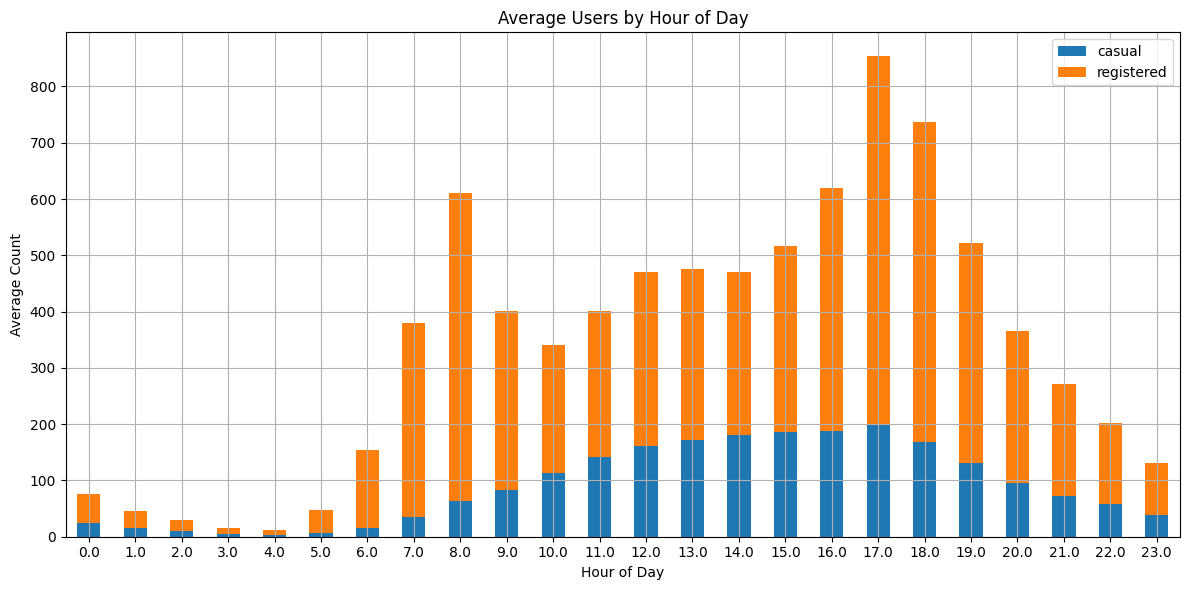

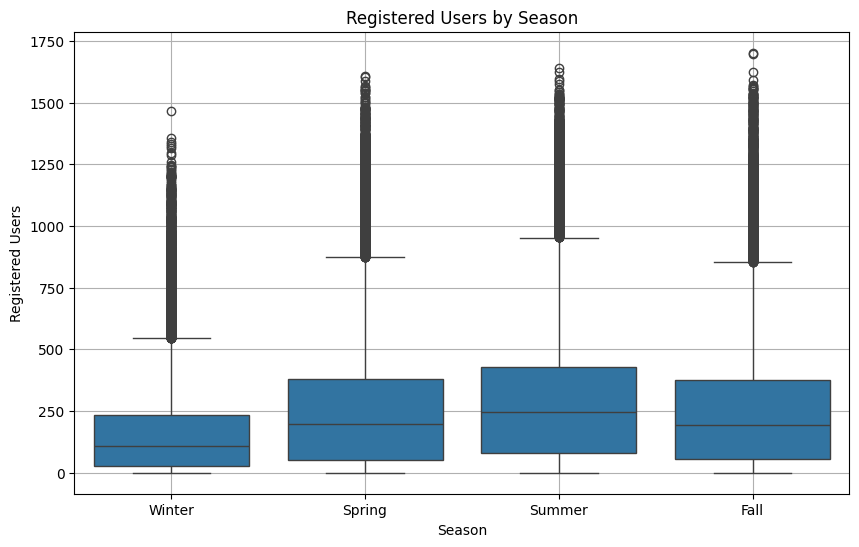

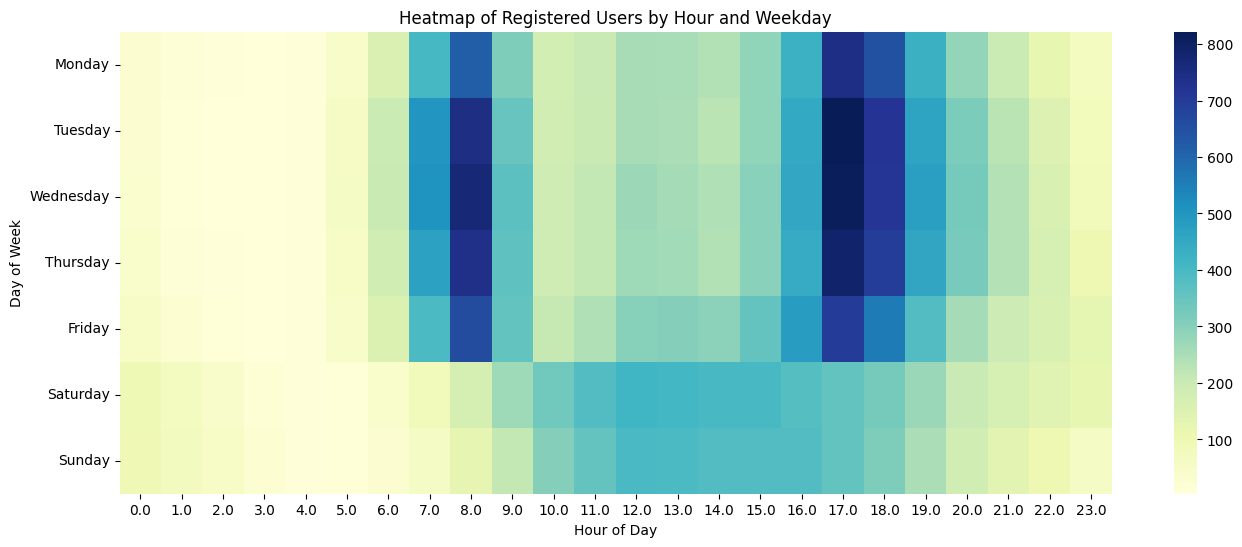

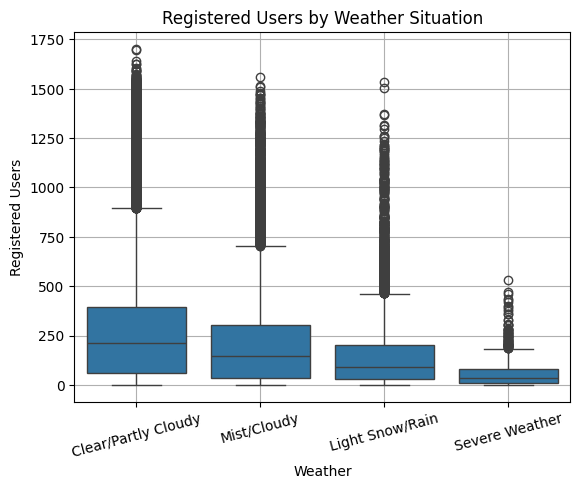

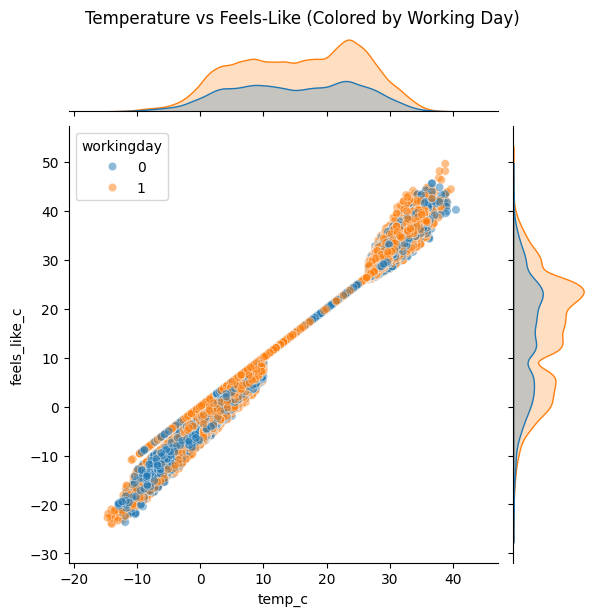

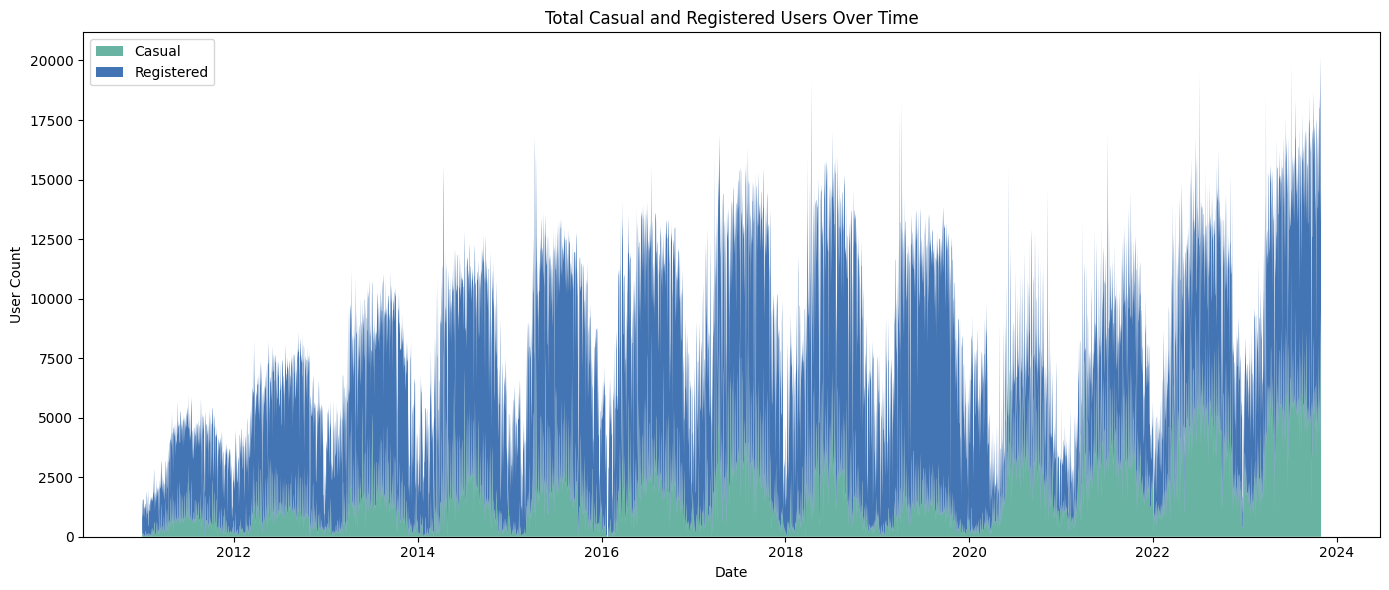

<ipython-input-34-c03e15891bda>:105: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_group = bikes_test.groupby('temp_bin')[['casual', 'registered']].mean()


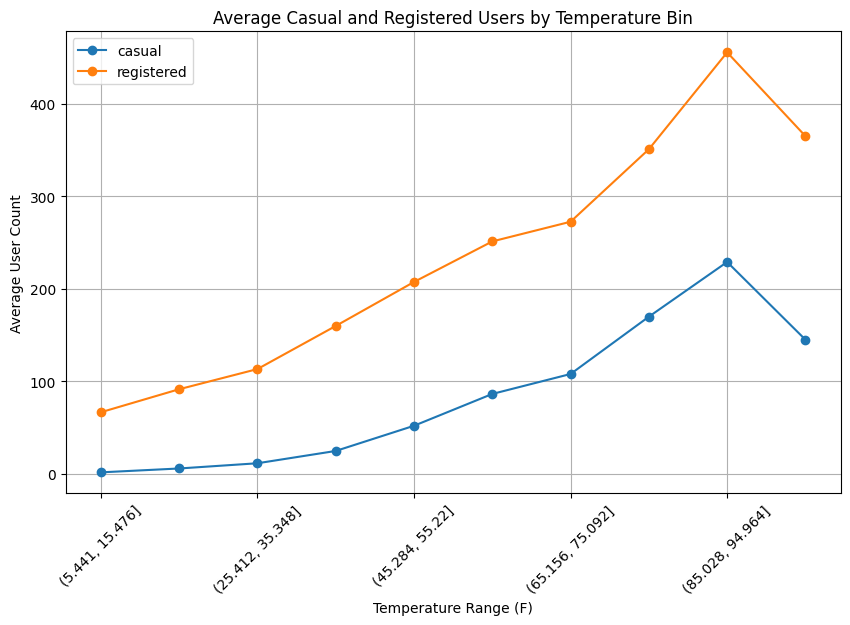

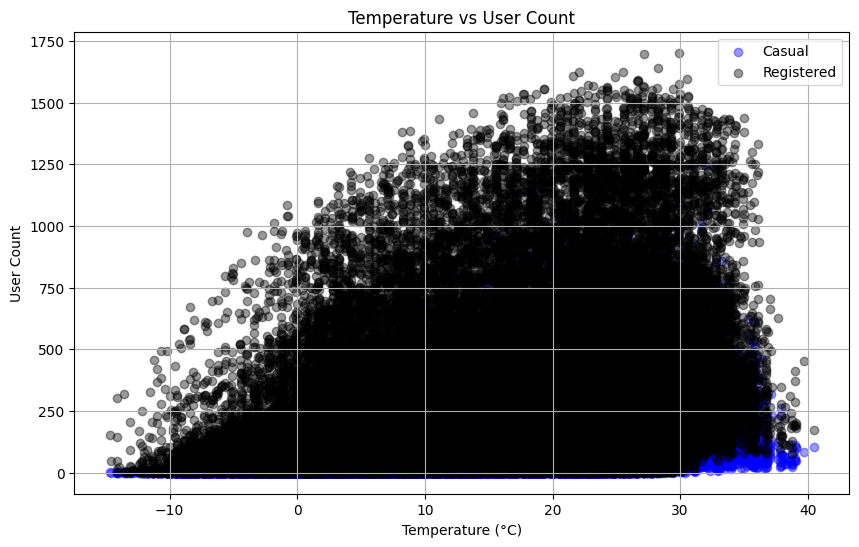

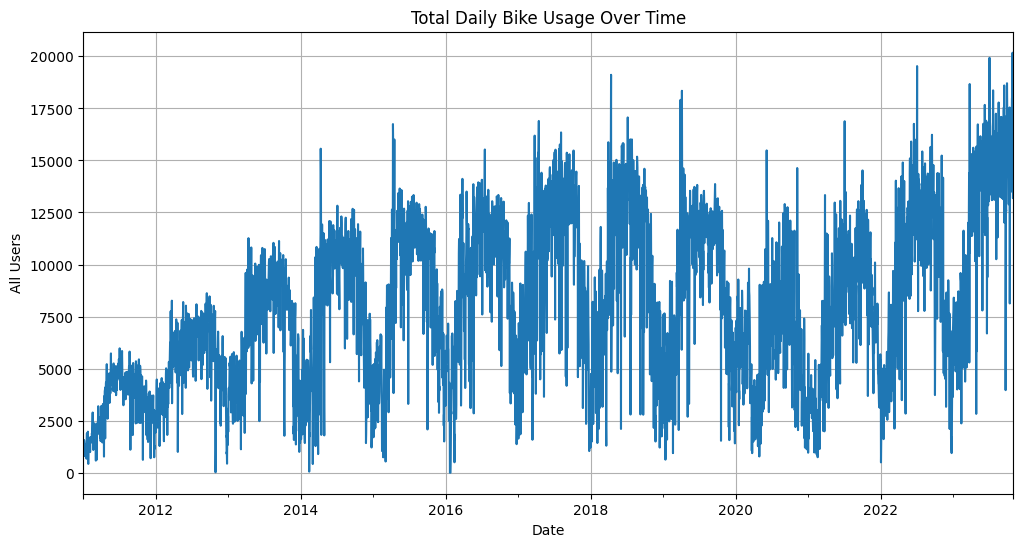

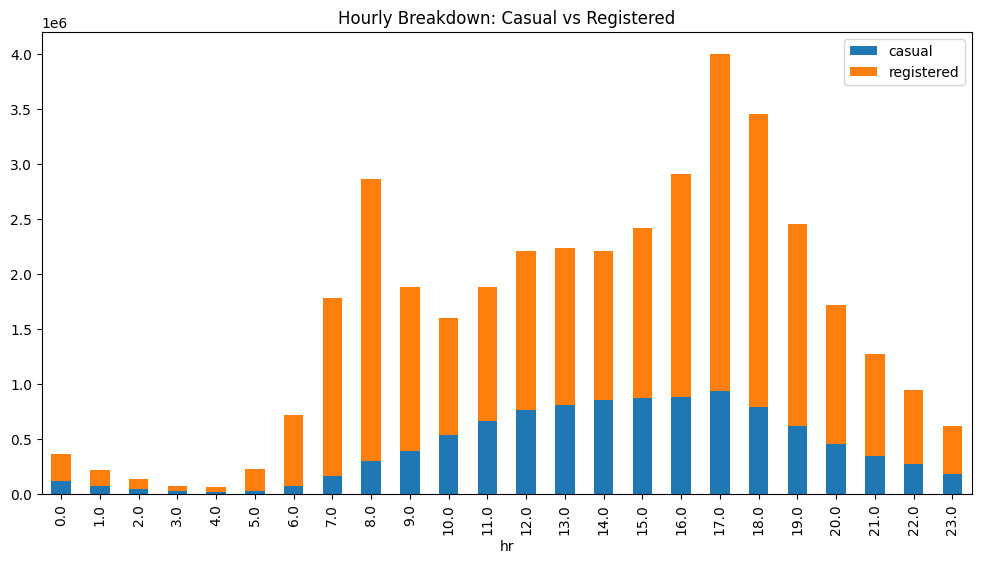

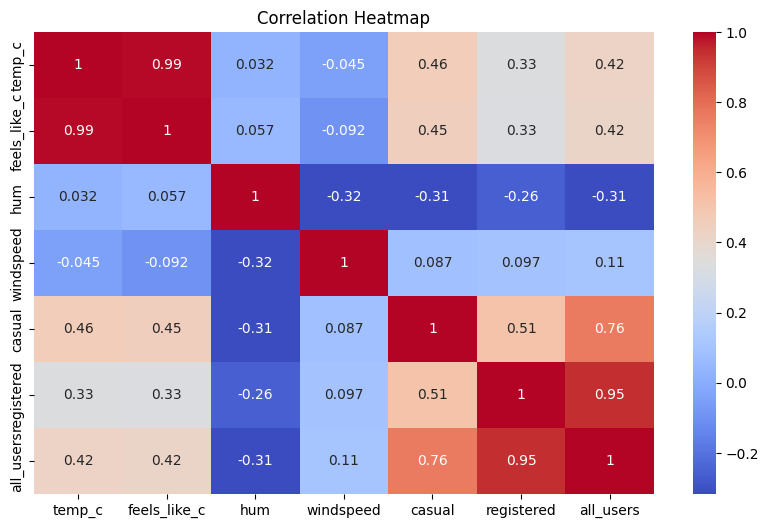

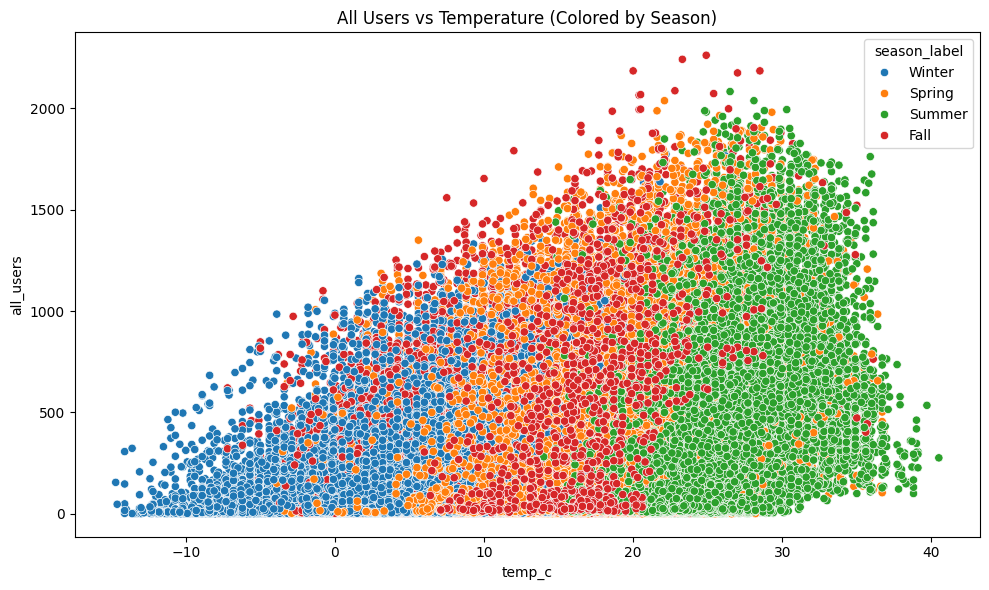

In [ ]:
### This will be for the charting exploration so that the data can explored ###

import matplotlib.pyplot as plt
import seaborn as sns

## Number of Users by Hour ###

plt.figure(figsize=(12,6))
hourly_avg = bikes_test.groupby('hr')[['casual', 'registered']].mean()
hourly_avg.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Average Users by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


### Number of Users by Season (ie, should also compare and see if there are seasons where casual versus registered varies)

plt.figure(figsize=(10,6))
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
bikes_test['season_label'] = bikes_test['season'].map(season_map)
sns.boxplot(data=bikes_test, x='season_label', y='registered')
plt.title('Registered Users by Season')
plt.xlabel('Season')
plt.ylabel('Registered Users')
plt.grid(True)
plt.show()


### Users compared by hour and weekday ### (Heat Map should be changed...)

bikes_test['weekday'] = bikes_test['dteday'].dt.day_name()
pivot = bikes_test.pivot_table(values='registered', index='weekday', columns='hr', aggfunc='mean')
pivot = pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(16, 6))
sns.heatmap(pivot, cmap="YlGnBu", annot=False)
plt.title('Heatmap of Registered Users by Hour and Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


### Weather impact of the users renting bikes ###

weather_map = {
    1: 'Clear/Partly Cloudy', 2: 'Mist/Cloudy',
    3: 'Light Snow/Rain', 4: 'Severe Weather'
}
bikes_test['weather_label'] = bikes_test['weathersit'].map(weather_map)
sns.boxplot(data=bikes_test, x='weather_label', y='registered')
plt.title('Registered Users by Weather Situation')
plt.xticks(rotation=15)
plt.xlabel('Weather')
plt.ylabel('Registered Users')
plt.grid(True)
plt.show()


### Temperature Influence on Users ###

# This was created using a jointpoint, which is super awesome for combining elements of different plotting elements.

sns.jointplot(data=bikes_test, x='temp_c', y='feels_like_c', hue='workingday',
              kind='scatter', alpha=0.5)
plt.suptitle("Temperature vs Feels-Like (Colored by Working Day)", y=1.02)
plt.show()

### Casual and Registered users compared by season to determine if they change...
#

# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=bikes_test.melt(id_vars='season_label', value_vars=['casual', 'registered']),
#                x='season_label', y='value', hue='variable')
# plt.title('Distribution of Casual vs Registered Users by Season')
# plt.xlabel('Season')
# plt.ylabel('User Count')
# plt.grid(True)
# plt.show()


### Casual Versus Registered Users using a stackplot measured overtime
## NOTE: This is definitely not the best visual charting method but one that was fun to explore.

df_day = bikes_test.groupby('dteday')[['casual', 'registered']].sum()

plt.figure(figsize=(14, 6))
plt.stackplot(df_day.index, df_day['casual'], df_day['registered'],
              labels=['Casual', 'Registered'], colors=['#69b3a2', '#4374B3'])
plt.title('Total Casual and Registered Users Over Time')
plt.xlabel('Date')
plt.ylabel('User Count')
plt.legend()
plt.tight_layout()
plt.show()


### Measures users over the course of several binned averages for temperature in celsius, using a lineplot, again another chart that I've never used, but will augment to better visualize the data.


bikes_test['temp_bin'] = pd.cut(bikes_test[f'temp_f'], bins=10)
temp_group = bikes_test.groupby('temp_bin')[['casual', 'registered']].mean()

temp_group.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Casual and Registered Users by Temperature Bin')
plt.xlabel('Temperature Range (F)')
plt.ylabel('Average User Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Average Users by Temperature ###
### Scatplot

plt.figure(figsize=(10, 6))
plt.scatter(bikes_test['temp_c'], bikes_test['casual'], alpha=0.4, label='Casual', color='blue')
plt.scatter(bikes_test['temp_c'], bikes_test['registered'], alpha=0.4, label='Registered', color='black')
plt.title("Temperature vs User Count")
plt.xlabel("Temperature (°C)")
plt.ylabel("User Count")
plt.legend()
plt.grid(True)
plt.show()


### Total Usage of the Bikes Overtime ###

import matplotlib.pyplot as plt

bikes_test['dteday'] = pd.to_datetime(bikes_test['dteday'])
daily_usage = bikes_test.groupby('dteday')['all_users'].sum()

plt.figure(figsize=(12,6))
daily_usage.plot()
plt.title('Total Daily Bike Usage Over Time')
plt.xlabel('Date')
plt.ylabel('All Users')
plt.grid(True)


### Casual VS Registered (by hour and/or by month)

hourly = bikes_test.groupby('hr')[['casual', 'registered']].sum()
hourly.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Hourly Breakdown: Casual vs Registered')


## Correlation Heatmap of the Features ##

plt.figure(figsize=(10, 6))
sns.heatmap(bikes_test[['temp_c', 'feels_like_c', 'hum', 'windspeed', 'casual', 'registered', 'all_users']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Temperature versus that of ALL of the users for the bikes ###

plt.figure(figsize=(10,6))
sns.scatterplot(data=bikes_test, x='temp_c', y='all_users', hue='season_label')
plt.title("All Users vs Temperature (Colored by Season)")
plt.tight_layout()
plt.show()























In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score


### Could also use pytorch as the performance is alledgely better than tensorflow, which is otherwise optimzied for scaling models in a production environment.




In [ ]:
bikes_test.corr(numeric_only=True)["registered"].sort_values(ascending=False)

bikes_test.corr(numeric_only=True)["casual"].sort_values(ascending=False)

bikes_test['all_users'] = bikes_test['casual'] + bikes_test['registered']

# Now that the total user base is combined, I wanted to see what in particular influenced this and how much it differed from the base feature(s).

bikes_test.corr(numeric_only=True)["all_users"].sort_values(ascending=False)


,all_users
all_users,1.000000
registered,0.946539
casual,0.762000
temp_c,0.424704
temp_f,0.424704
feels_like_c,0.415934
feels_like_f,0.415934
hr,0.366978
season,0.149209
windspeed,0.105580


In [ ]:
# Onehot encoding...

categorical_cols = ['season', 'weathersit', 'season_label', 'temp_bin', 'weather_label', 'weekday']
existing_cols = [col for col in categorical_cols if col in bikes_test.columns]


bikes_encoded = pd.get_dummies(bikes_test, columns=existing_cols, drop_first=True)


bikes_encoded = bikes_encoded.drop(columns=['dteday'])


X = bikes_encoded.drop(columns=['casual', 'registered', 'all_users'])
y = bikes_encoded['all_users']



In [ ]:



X = bikes_test.drop(columns=['dteday', 'casual', 'registered', 'season_label', 'weather_label', 'weekday', 'temp_bin', 'all_users'])
y = bikes_test['all_users']

In [ ]:
# look at data, now it is all numeric
X




,hr,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,week,day_of_week,month,temp_f,feels_like_f
0,0.0,3.0,3.0,0.80,0.8,1,1,0,0,52,5,1,37.40,37.40
1,1.0,1.7,1.7,0.83,0.8,1,1,0,0,52,5,1,35.06,35.06
2,2.0,1.9,1.9,0.82,1.1,1,1,0,0,52,5,1,35.42,35.42
3,3.0,2.5,2.5,0.78,0.8,1,1,0,0,52,5,1,36.50,36.50
4,4.0,2.0,2.0,0.81,1.1,1,1,0,0,52,5,1,35.60,35.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112470,19.0,10.2,10.2,0.45,8.4,2,4,0,1,44,1,10,50.36,50.36
112471,20.0,8.9,7.5,0.53,9.3,1,4,0,1,44,1,10,48.02,45.50
112472,21.0,7.7,6.4,0.58,7.8,1,4,0,1,44,1,10,45.86,43.52
112473,22.0,8.0,8.0,0.56,0.0,1,4,0,1,44,1,10,46.40,46.40


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_train

,all_users
95962,138
34637,191
5954,1
109932,34
103772,1029
...,...
76820,100
110268,51
103694,18
860,67


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [ ]:
# Check against what needs to be analyzed within the X_train.
# len(X_train[0])

14

In [ ]:
# build a neural network using a sequential model
# input layer node size is the same as the training columns
# hidden layers: 128 node layer, 256 node layer, 64 node layer
# a single node output layer

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score



model = Sequential()
model.add(Dense(30, input_dim=len(X_train[0]), activation='relu'))
model.add(Dropout(.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='leaky_relu'))


# Used Relu as its considered one of the best, however, my performance varied significantly for this.,.

model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,457 (201.00 KB)

 Trainable params: 51,457 (201.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# opt = keras.optimizers.Adam(learning_rate=0.0001)
from tensorflow import keras

## What optimizer is the best to use in this case, this is something that I am still exploring.
# Grams is supposedly the best one... instead of
## NEED to adjust the learning rate as the loss is way too high...

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

history = model.fit(X_train, y_train, epochs=20, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)


Epoch 1/100
2559/2559 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 25621.1738 - mse: 25621.1738 - val_loss: 36742.8320 - val_mse: 36742.8320
Epoch 2/100
1832/2559 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25776.3203 - mse: 25776.3203

KeyboardInterrupt: 

In [ ]:

### NEEED to adjust my learning rate, early dropout, and potentially even my overall epoch rate... ###


In [ ]:
hist

,loss,mse,val_loss,val_mse
0,27566.345703,27566.345703,34747.449219,34747.449219
1,27008.957031,27008.957031,35062.867188,35062.867188
2,27038.044922,27038.044922,34946.562500,34946.562500
3,26830.042969,26830.042969,35815.507812,35815.507812
4,26863.628906,26863.628906,36180.164062,36180.164062
5,26628.910156,26628.910156,36056.546875,36056.546875
6,26622.009766,26622.009766,36179.839844,36179.839844
7,26593.953125,26593.953125,36057.296875,36057.296875
8,26670.625000,26670.625000,36744.949219,36744.949219
9,26392.986328,26392.986328,36594.855469,36594.855469


In [ ]:
h = hist
hist = hist.reset_index()
h

### NEED to use the hisogram at some point



,loss,mse,val_loss,val_mse
0,27566.345703,27566.345703,34747.449219,34747.449219
1,27008.957031,27008.957031,35062.867188,35062.867188
2,27038.044922,27038.044922,34946.562500,34946.562500
3,26830.042969,26830.042969,35815.507812,35815.507812
4,26863.628906,26863.628906,36180.164062,36180.164062
5,26628.910156,26628.910156,36056.546875,36056.546875
6,26622.009766,26622.009766,36179.839844,36179.839844
7,26593.953125,26593.953125,36057.296875,36057.296875
8,26670.625000,26670.625000,36744.949219,36744.949219
9,26392.986328,26392.986328,36594.855469,36594.855469


In [ ]:
import numpy as np

predictions = np.round(model.predict(X_test),1)

1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


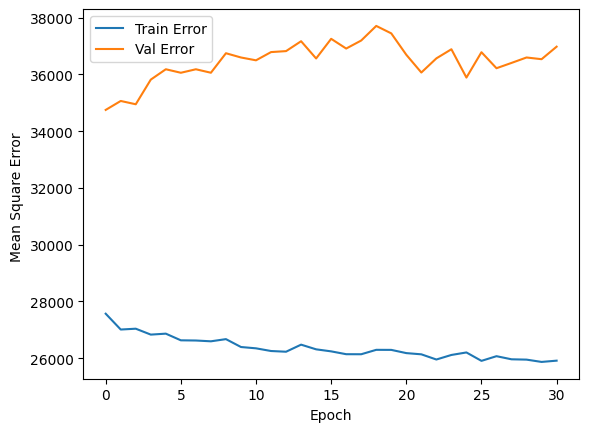

In [ ]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [ ]:
predictions = np.round(model.predict(X_test),1)

1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
predictions

array([[456.6],
       [847.4],
       [876.9],
       ...,
       [187. ],
       [  0. ],
       [442.3]], dtype=float32)

In [ ]:

result = root_mean_squared_error(y_test, predictions)
result

192.03875732421875

In [ ]:

r2 = r2_score(y_test,predictions)
r2

0.6882854700088501

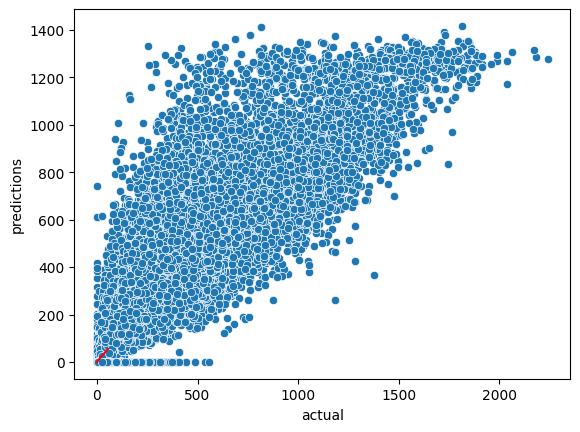

In [ ]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()